In [27]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [49]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [50]:
Query = '''select f.film_id,f.rental_duration,f.rental_rate,f.length,fc.category_id,f.rating,
(select count(*)   
from rental r
join inventory i
using (inventory_id)
where i.film_id = f.film_id and 
(year(r.rental_date) = 2005) & (month(r.rental_date)=05)
)
as 'rented_in_may'
from film f
join film_category fc
using(film_id)
order by f.film_id'''

In [51]:
data = pd.read_sql_query(Query,engine)

In [52]:
data

,film_id,rental_duration,rental_rate,length,category_id,rating,rented_in_may
0,1,6,0.99,86,6,PG,2
1,2,3,4.99,48,11,G,0
2,3,7,2.99,50,6,NC-17,1
3,4,5,2.99,117,11,G,2
4,5,6,2.99,130,8,G,1
...,...,...,...,...,...,...,...
995,996,6,0.99,183,6,G,0
996,997,4,0.99,179,12,NC-17,0
997,998,6,0.99,105,11,NC-17,1
998,999,5,2.99,101,3,R,1


In [53]:
import numpy as np
data["rented_in_may"] = np.where(data["rented_in_may"] == 0,"NO","YES")

In [54]:
data

,film_id,rental_duration,rental_rate,length,category_id,rating,rented_in_may
0,1,6,0.99,86,6,PG,YES
1,2,3,4.99,48,11,G,NO
2,3,7,2.99,50,6,NC-17,YES
3,4,5,2.99,117,11,G,YES
4,5,6,2.99,130,8,G,YES
...,...,...,...,...,...,...,...
995,996,6,0.99,183,6,G,NO
996,997,4,0.99,179,12,NC-17,NO
997,998,6,0.99,105,11,NC-17,YES
998,999,5,2.99,101,3,R,YES


# checking for null values

In [55]:
data.isna().sum()

film_id            0
rental_duration    0
rental_rate        0
length             0
category_id        0
rating             0
rented_in_may      0
dtype: int64

# Categorical column

In [56]:
data.select_dtypes(include = "object")

,rating,rented_in_may
0,PG,YES
1,G,NO
2,NC-17,YES
3,G,YES
4,G,YES
...,...,...
995,G,NO
996,NC-17,NO
997,NC-17,YES
998,R,YES


In [57]:
data["rating"].value_counts() # No need of cleaning

PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: rating, dtype: int64

# numeriacl column


In [58]:
data.select_dtypes(exclude = 'object')

,film_id,rental_duration,rental_rate,length,category_id
0,1,6,0.99,86,6
1,2,3,4.99,48,11
2,3,7,2.99,50,6
3,4,5,2.99,117,11
4,5,6,2.99,130,8
...,...,...,...,...,...
995,996,6,0.99,183,6
996,997,4,0.99,179,12
997,998,6,0.99,105,11
998,999,5,2.99,101,3


In [59]:
#film_id is unique values--- we can drop it 
data.drop("film_id",axis = 1,inplace=True)

In [60]:
data["category_id"].value_counts() ## we can see category_id has moderate range of value counts-- we can convert it into category


15    74
9     73
8     69
6     68
2     66
1     64
13    63
7     62
14    61
10    61
3     60
5     58
16    57
4     57
11    56
12    51
Name: category_id, dtype: int64

In [61]:
data["category_id"] = data["category_id"].astype("object")

In [62]:
import seaborn as sns

In [63]:
num = data.select_dtypes(exclude="object")

In [64]:
a = num.columns

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


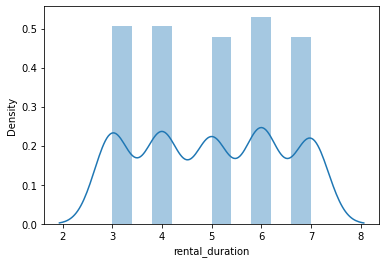

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


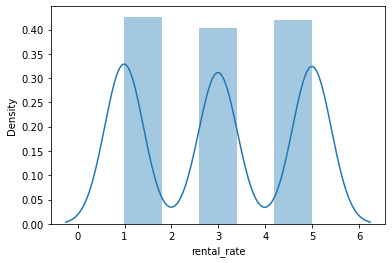

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


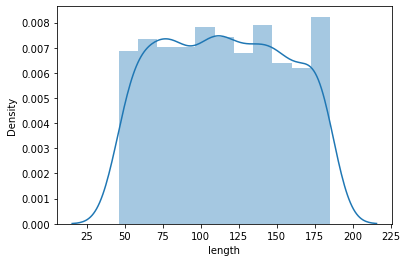

In [65]:
import matplotlib.pyplot as plt
for i in a:
    sns.distplot(data[i])
    plt.show()


In [66]:
# from the above graphs we can conclude that length and rental duraiton of movie are important factors

# plotting categorical column

In [67]:
cat = data.select_dtypes(include = "object")
b = cat.columns
b

Index(['category_id', 'rating', 'rented_in_may'], dtype='object')

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


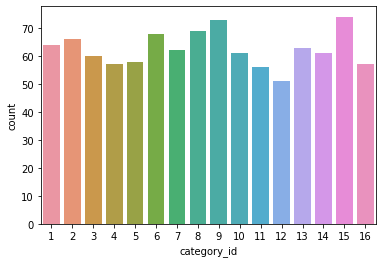

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


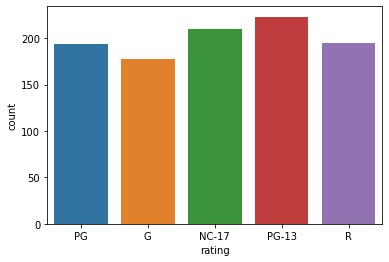

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


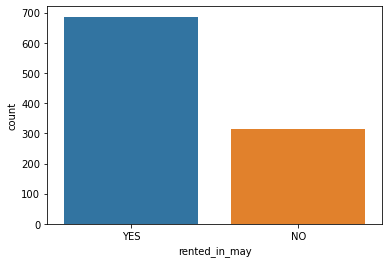

In [68]:
import matplotlib.pyplot as plt
for i in b:
    sns.countplot(data[i])
    plt.show()

# check for multicolinearity
data

In [69]:
data

,rental_duration,rental_rate,length,category_id,rating,rented_in_may
0,6,0.99,86,6,PG,YES
1,3,4.99,48,11,G,NO
2,7,2.99,50,6,NC-17,YES
3,5,2.99,117,11,G,YES
4,6,2.99,130,8,G,YES
...,...,...,...,...,...,...
995,6,0.99,183,6,G,NO
996,4,0.99,179,12,NC-17,NO
997,6,0.99,105,11,NC-17,YES
998,5,2.99,101,3,R,YES


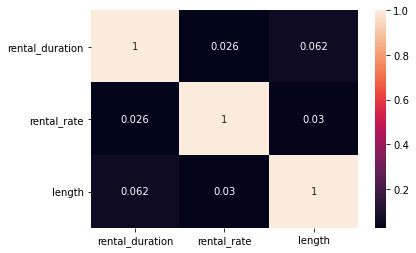

In [70]:
corr_matrix=data.corr()  # default
# fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [71]:
y = data["rented_in_may"]
X = data.drop(['rented_in_may'],axis=1)

In [72]:
y

0      YES
1       NO
2      YES
3      YES
4      YES
      ... 
995     NO
996     NO
997    YES
998    YES
999    YES
Name: rented_in_may, Length: 1000, dtype: object

In [73]:
X

,rental_duration,rental_rate,length,category_id,rating
0,6,0.99,86,6,PG
1,3,4.99,48,11,G
2,7,2.99,50,6,NC-17
3,5,2.99,117,11,G
4,6,2.99,130,8,G
...,...,...,...,...,...
995,6,0.99,183,6,G
996,4,0.99,179,12,NC-17
997,6,0.99,105,11,NC-17
998,5,2.99,101,3,R


# Train test split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [81]:
Cat_train = X_train.select_dtypes(include = "object")

In [82]:
Cat_train

,category_id,rating
46,9,NC-17
789,7,PG-13
722,14,PG-13
283,12,NC-17
39,6,R
...,...,...
167,3,R
232,16,PG
860,10,R
189,4,NC-17


In [79]:
Num_train = Cat = X_train.select_dtypes(exclude = "object")

In [80]:
Num_train

,rental_duration,rental_rate,length
46,5,4.99,153
789,6,0.99,67
722,3,2.99,82
283,5,4.99,77
39,4,0.99,148
...,...,...,...
167,5,0.99,67
232,3,0.99,141
860,3,4.99,111
189,5,4.99,172


# Min Max Scaler 

In [85]:
# Scaling data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(Num_train) # need to keep transformer
X_train_normalized = transformer.transform(Num_train)
X_train_norm = pd.DataFrame(X_train_normalized, columns=Num_train.columns)
X_train_norm

,rental_duration,rental_rate,length
0,0.50,1.0,0.769784
1,0.75,0.0,0.151079
2,0.00,0.5,0.258993
3,0.50,1.0,0.223022
4,0.25,0.0,0.733813
...,...,...,...
795,0.50,0.0,0.151079
796,0.00,0.0,0.683453
797,0.00,1.0,0.467626
798,0.50,1.0,0.906475


# One hot Encoding

In [95]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() 
X_train_cat= enc.fit_transform(Cat_train).toarray()
X_train_cat1 = pd.DataFrame(X_train_cat,columns=enc.get_feature_names(input_features= ["category_id","rating"]))

In [96]:
X_train_cat1

,category_id_1,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,...,category_id_12,category_id_13,category_id_14,category_id_15,category_id_16,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [110]:
X_train1 = pd.concat([X_train_norm,X_train_cat1],axis =1)
X_train1.shape

(800, 24)

# Training the model

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [112]:
model = LogisticRegression()
model.fit(X_train1, y_train)

LogisticRegression()

In [107]:
X_test_num =  X_test.select_dtypes(exclude = "object") 
X_test_cat = X_test.select_dtypes(include = "object")

# sclaing the test data --- numerical

In [108]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

,rental_duration,rental_rate,length
0,0.00,0.0,0.374101
1,0.75,0.5,0.964029
2,0.25,0.5,0.316547
3,1.00,0.5,0.618705
4,0.25,0.0,0.453237
...,...,...,...
195,0.25,0.0,0.402878
196,0.25,0.5,0.446043
197,1.00,0.5,0.273381
198,0.25,0.0,0.294964


# Coding the categorical test data

In [109]:
X_test_cat= enc.transform(X_test_cat).toarray()
X_test_cat1 = pd.DataFrame(X_test_cat,columns=enc.get_feature_names(input_features= ["category_id","rating"]))

In [113]:
X_test1 = pd.concat([X_test_norm,X_test_cat1],axis = 1)

In [114]:
y_pred = model.predict(X_test1)

In [118]:
accuracy = metrics.accuracy_score(y_test, y_pred)
#f1_score = metrics.f1_score(y_test, y_pred)

In [119]:
accuracy

0.695

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  2,  60],
       [  1, 137]], dtype=int64)

In [124]:
score = model.score(X_test1, y_test)
print("Test Accuracy Score", score)

Test Accuracy Score 0.695
